In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statistics

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
print(np.mean(tips['total_bill']))

19.78594262295082


In [5]:
print(np.median(tips['total_bill']))

17.795


In [6]:
statistics.mode(tips['total_bill'])

13.42

<Axes: xlabel='total_bill'>

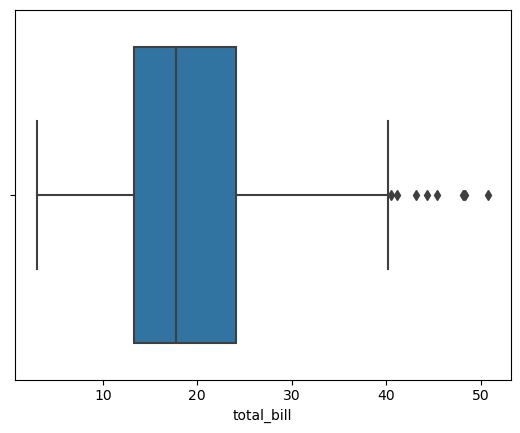

In [7]:
sns.boxplot(data=tips,x=tips['total_bill'])

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

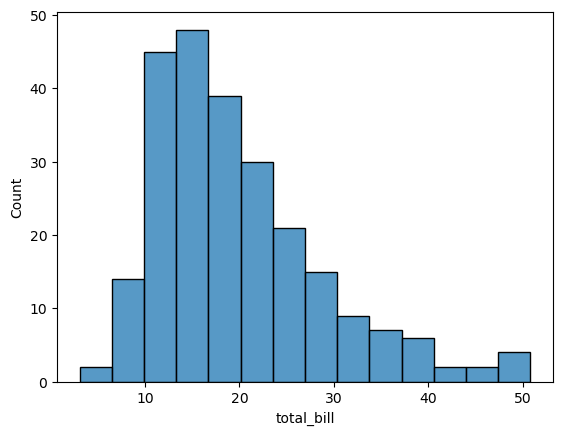

In [8]:
sns.histplot(data=tips,x=tips['total_bill'])

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

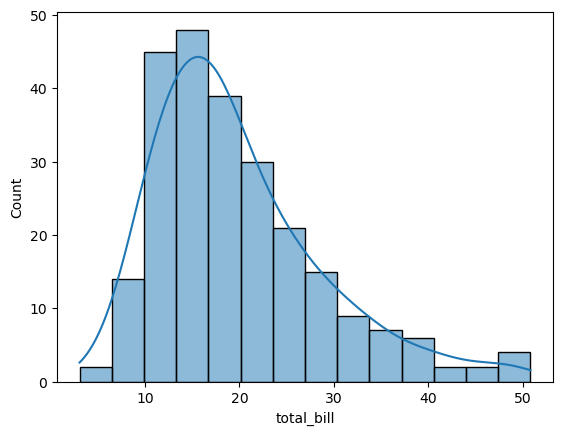

In [9]:
sns.histplot(tips['total_bill'],kde=True)

In [10]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

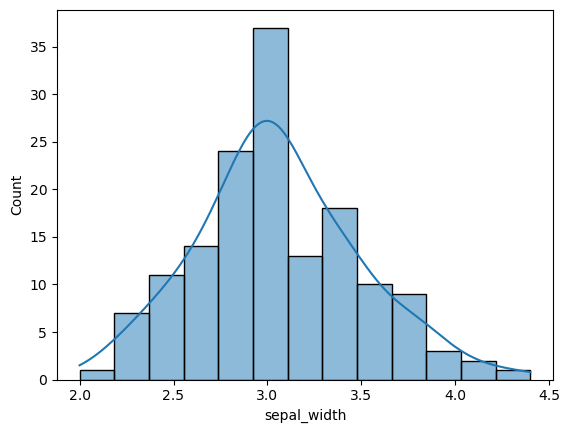

In [11]:
sns.histplot(data=iris,x=iris['sepal_width'],kde=True)

<h3>The above one i.e, sepal_width data is normally distributed</h4>

<Axes: xlabel='species', ylabel='count'>

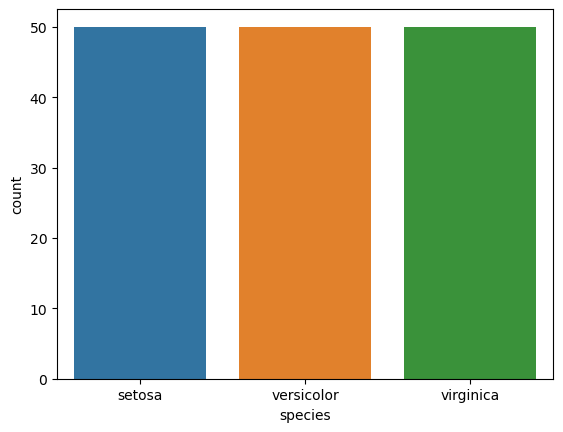

In [12]:
sns.countplot(data=iris,x=iris['species'])

In [13]:
li = np.percentile(iris['sepal_length'],[25,75])
print(li)
q1 = li[0]
q3 = li[1]

[5.1 6.4]


<h3>the value 5.1 is the 25th percentile value which means there are 25% of the values of the sepal_length data which are less than 5.1 . and the value 6.4 is the 75th percentile value Same for 75th percentile there are 75% of the values of the sepal_length data which are less than 6.4 . </h3>

In [14]:
## IQR (Inter Quartile Range)

iqr = q3 - q1
print(iqr)

1.3000000000000007


<h3>Finding Outliers</h3>

In [15]:
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,100]

In [16]:
## finding outliers using Z-Score

outliers = []

def detect_outliers(data):
    threshold = 3   ## 3 standard deviation
    
    mean = np.mean(data)
    sd = np.std(data)
    
    for i in data:
        z_score = (i - mean)/sd
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    return outliers

In [17]:
print(detect_outliers(data))

[100]


<h3>
finding outliers using IQR

steps to follow are:
 1. sort the data
 2. calculate Q1 and Q3
 3. IQR(Q3 - Q1)
 4. Find the lower fence (Q1 - (1.5*IQR))
 5. Find the upper fence (Q3 + (1.5*IQR))
</h3>

In [18]:
dataset = sorted(data)
dataset.append(800)
print(dataset)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 100, 800]


In [19]:
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

4.5 11.5


In [20]:
iqr = q3 - q1
print(iqr)

7.0


In [21]:
lower_fence = q1 - (1.5 * iqr)
higher_fence = q3 + (1.5 * iqr)

print(lower_fence,higher_fence)

-6.0 22.0


In [22]:
outlier = []

for i in dataset:
    if (i < lower_fence) or (i > higher_fence):
        outlier.append(i)

print(outlier)

[100, 800]


<Axes: >

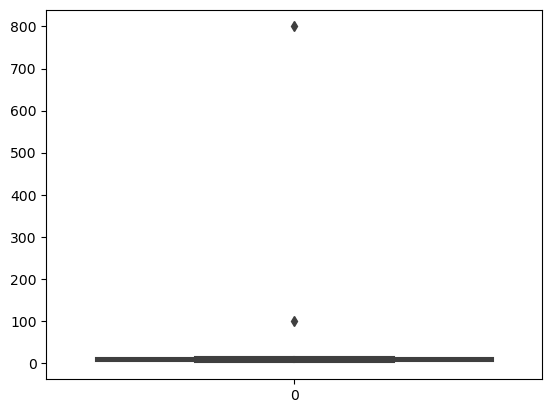

In [23]:
sns.boxplot(dataset)

<h3 style="color:blue">Z-Test Example</h3>

<H4>Suppose the IQ in a certain population is normally distributed with mean of μ=100 and a standard deviation of σ=15.</H4>
<h4>A researcher wants to know if the new drug affects the IQ levels, so he recruits 20 patients to try it and record their IQ levels.</h4>
<h4>The following code shows how to perform a one-sample z-test in python if the new drug causes a significant difference in IQ levels.</h4>

In [30]:
from statsmodels.stats.weightstats import ztest as ztest

## IQ levels of 20 students.
data = [88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

print(ztest(data,value=100))
# first value is z-score and second value is p-value.

(1.5976240527147705, 0.1101266701438426)


In [39]:
# let ho = (μ=100) and h1 = (μ != 100)

μ = 100

z_score, p_value = ztest(data,value=μ)

alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in IQ levels because of new drug")
else:
    print("Failed to reject the null hypothesis: There is no significant difference in IQ levels because of new drug")

Failed to reject the null hypothesis: There is no significant difference in IQ levels because of new drug


<h4>The above output indicates that there is not enough evidence to conclude that the drug affects IQ levels at the 5% significance level.</h4>

<h3 style="color:blue">t - test Example</h3>

In [40]:
ages = [10,20,35,44,27,68,94,25,67,81,25,70,98,99,12,18,49]

In [49]:
import statistics
import numpy as np

ages_mean = statistics.mean(ages)
# or
print(np.mean(ages))

49.529411764705884


In [50]:
## let us take a sample from ages(population)

sample_size = 9

age_sample = np.random.choice(ages,sample_size)
age_sample

array([67, 68, 49, 67, 99, 81, 49, 18, 44])

In [75]:
from scipy.stats import ttest_1samp   # t-test for 1 sample

ttest_1samp(age_sample,49.529411764705884)     ## ttest_1samp(sample,populaiton_mean)

TtestResult(statistic=1.3700796264096546, pvalue=0.2078760195650053, df=8)

<h3>Above, The pvalue is greater than alpha(0.05) so, we fail to reject the null hypothesis. or we have to accept the null hypothesis.</h3>

<h2 style="color:red">Example - 2</h2>

In [71]:
# ages of college students (population)
# we are going to find the ages of class A students and compare the mean of ages of college students(population) is nearer to sample(class A) mean.

import numpy as np
import pandas as pd
import math
import scipy.stats as stats

np.random.seed(9)


## generates 1500 random samples from a Poisson distribution with a mean of 35, and each sample is then increased by 18 due to the loc parameter.
college_ages = stats.poisson.rvs(loc=18,mu=35,size=1500)

## generates 60 random samples from a Poisson distribution with a mean of 30, and each sample is then increased by 18 due to the loc parameter.
classA_ages = stats.poisson.rvs(loc=18,mu=30,size=60)

In [72]:
college_ages    

array([53, 46, 52, ..., 50, 55, 52], dtype=int64)

In [79]:
college_ages.mean()

53.03933333333333

In [80]:
classA_ages

array([53, 45, 38, 50, 42, 40, 42, 47, 49, 43, 43, 41, 46, 60, 59, 48, 42,
       42, 40, 46, 47, 47, 50, 54, 41, 41, 45, 49, 44, 52, 51, 49, 41, 43,
       52, 49, 51, 43, 53, 54, 58, 48, 48, 46, 52, 49, 41, 53, 36, 53, 48,
       54, 51, 45, 42, 49, 50, 48, 57, 53], dtype=int64)

In [81]:
classA_ages.mean()

47.55

In [83]:
ttest_1samp(classA_ages,college_ages.mean())     ## ttest_1samp(sample,populaiton_mean)

TtestResult(statistic=-7.886933258742133, pvalue=8.500042910646661e-11, df=59)

<h4>p-value is 8.50004291064666 x 10^-11, so it is so small value.<br> <br>Given the t-test result with a p-value much smaller than the significance level (0.05), we reject the null hypothesis. This means there is sufficient evidence to suggest that the mean age of the school population is different from the mean age of the class population.<br>

In practical terms, it indicates that there is a statistically significant age difference between the school and the class.</h4>

C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


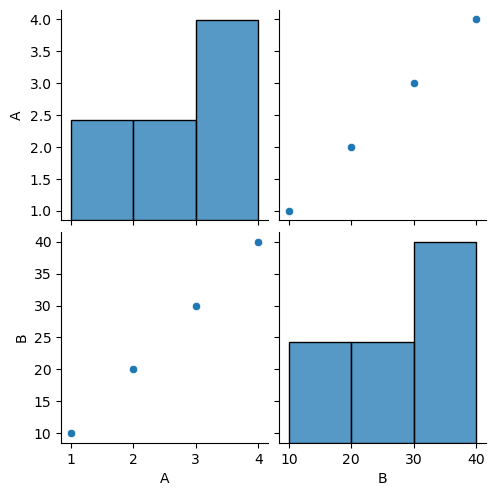

In [85]:
## example for plotting the data


import seaborn as sns
import pandas as pd

data = {
    "A" : [1,2,3,4],
    "B" : [10,20,30,40]
}

df = pd.DataFrame(data)

sns.pairplot(df)

In [86]:
df.corr()      # it gives the correlation of the data

,A,B
A,1.0,1.0
B,1.0,1.0


C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

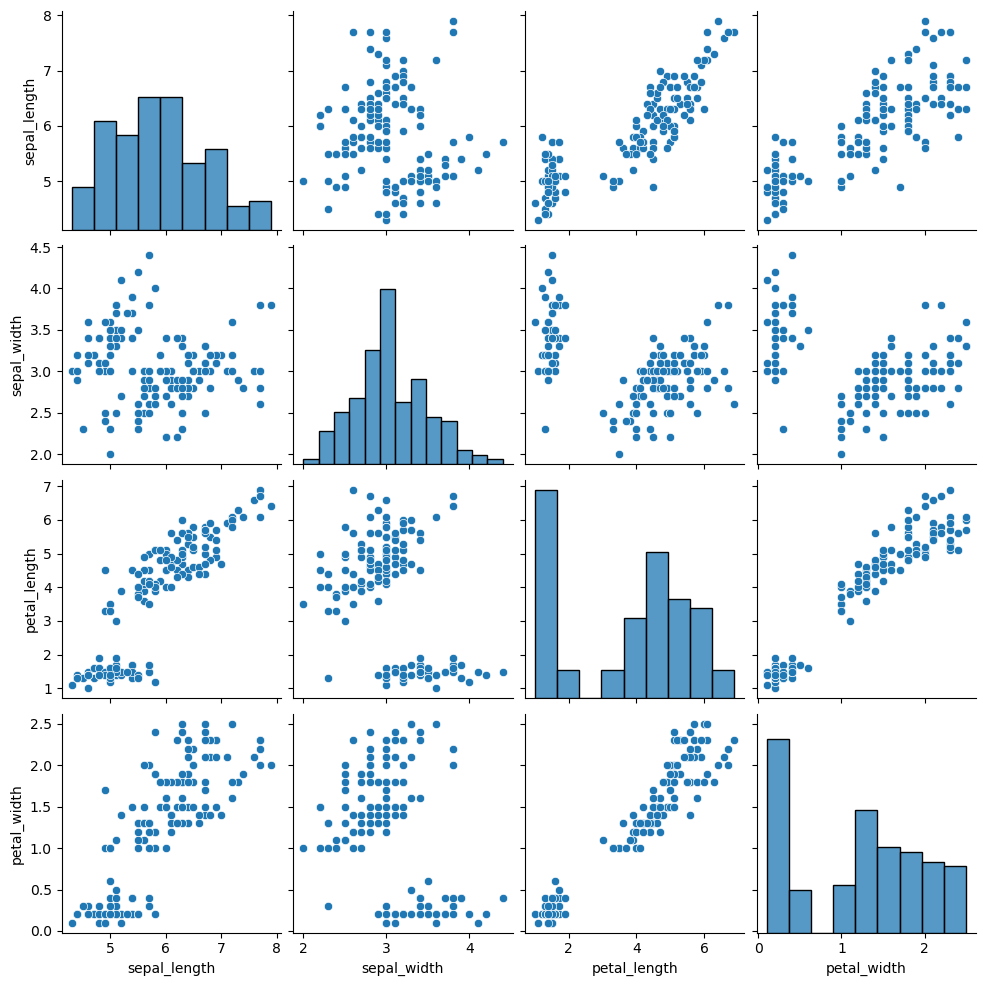

In [88]:
datafr = sns.load_dataset('iris')

sns.pairplot(datafr)

In [92]:
num_df = datafr.copy()
num_df = num_df.drop('species',axis=1)

num_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
